In [ ]:
!pip install tweepy==4.10.1 
!pip show tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 KB 1.2 MB/s eta 0:00:00
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.13.0
    Uninstalling tweepy-4.13.0:
      Successfully uninstalled tweepy-4.13.0
Name: tweepy
Version: 4.10.1
Summary: Twitter library for Python
Home-page: https://www.tweepy.org/
Author: Joshua Roesslein
Author-email: tweepy@googlegroups.com
License: MIT
Location: /usr/local/lib/python3.9/dist-packages
Requires: oauthlib, requests, requests-oauthlib
Required-by: 


In [ ]:
import os
import tweepy as twep
import pandas as pd

In [ ]:
#keys that are used to access the twitter API
consumer_key= 'Y3RJeJFRHnA9QnpZu8z9S0Skb'
consumer_secret= 'mSHz1KdYkTNmYWuxMwX4fMzzGc9qv1OqgyQxWU26pheoGRcLuE'
access_token= '1287803472805367808-EedGVpYxgeXKILni2gt9HvJacgsmxx'
access_token_secret= 'K9jXNXr6i72odGz9XAiUnN5841eIUiDKcrj52RozRO743'

In [ ]:
#Code to access the api and authentication to connect to twitter API
auth = twep.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = twep.API(auth, wait_on_rate_limit=True)

In [ ]:
#code for searching the Tweets with keyword Google and add them to a text file twitter.txt
keyword = 'Google'
limit=1000
tweets = twep.Cursor(api.search_tweets, q=keyword, tweet_mode='extended').items(limit)
file = open('twitter.txt', 'w', encoding="utf-8")
for tweet in tweets:
    file.write(tweet.full_text+'\n')
file.close()

In [ ]:
#code for searching the Tweets with keyword #GOOGLE and add them to a text file twitter.txt
keyword = '#GOOGLE'
limit=1000
tweets = twep.Cursor(api.search_tweets, q=keyword, tweet_mode='extended').items(limit)
file = open('twitter.txt', 'a', encoding="utf-8")
for tweet in tweets:
    file.write(tweet.full_text+'\n')
file.close()

In [ ]:
#code for searching the Tweets with keyword Google and Tesla and add them to a text file twitter.txt
keyword = 'google and Tesla'
limit=1000
tweets = twep.Cursor(api.search_tweets, q=keyword, tweet_mode='extended').items(limit)
file = open('twitter.txt', 'a', encoding="utf-8")
for tweet in tweets:
    file.write(tweet.full_text+'\n')
file.close()

In [ ]:
#opening file to write the processed text
file = open('processed.txt', 'w', encoding="utf-8")

In [ ]:
#preprocessing
import re
with open('twitter.txt','r', encoding="utf-8") as f:
    lines = f.readlines()
f.close()
for line in lines:
    content=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", line).split())
    file.write(content+'.'+'\n')
file.close()

In [ ]:
#Converting the input file into the list of sentences. 
Input = open("processed.txt", "r")
data = Input.read()
data_to_list = data.split("\n")
Input.close()

In [ ]:
#Adding the input text that needs to be classified to the TEST variable
Test_X=[]
for x in data_to_list:
    Test_X.append(x)
Test_X

['RT.',
 '2023.',
 'RT.',
 'Google Pixel Watch.',
 'Belkin.',
 'Logicool.',
 '5.',
 '.',
 '.',
 '.',
 'RT idowhatilove.',
 '.',
 'This is Winny and this is WINNY.',
 '.',
 '.',
 'thanawin winynny https.',
 'RT org Grandma Factory s presale starts on April 14.',
 '.',
 'They are building NFTs backed by exceptional luxury collectible a.',
 'RT Google During Hanukkah.',
 '.',
 'Google During Ramadan.',
 '.',
 'Google During Transgender Day of Visibility.',
 '.',
 'Google During Easter Sunday.',
 'RT fc set.',
 '.',
 '.',
 '2.',
 '1 55.',
 '2.',
 'Subtler dimension trouble When you hear is the challenge at all.',
 'use this.',
 'bath and body onass NOON promo NON TOYOU To you COUPON SIVVI NAMSHI CODE OUNAS discount OUNASS.',
 'Rolled on about Google.',
 'RT N o se engane O globalismo socialista e seus aparelhos enxergam com raz o o Cristianismo como inimigo.',
 '.',
 'O Google tem.',
 'RT hw 1177 SBS.',
 '2023 04 09 16 38 04 12 18 00.',
 '.',
 'SuperStar X gt gt.',
 'Android.',
 'RT A care

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#removing the stopwords and peroforming the lemmatization and appending back.
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
Test_data=[]
for x in Test_X:
    tokens = word_tokenize(str(x))
    final_tokens = [w for w in tokens if w not in stopword]
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
        if len(w)>1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    Test_data.append(' '.join(finalwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Removing duplicate and single word sentences.
Test_X=[]
for x in Test_data:
    if len(x)>10:
        Test_X.append(x)
Test_X = [*set(Test_X)]

Read the input from two separate sets that are connected to the stock sentiment into the two cells below to train the model.

In [ ]:
twit = pd.read_csv("/content/all-data.csv", encoding = "latin-1")
Train_Y=twit["Sentiment"]
Train_X=twit["Text"]

In [ ]:
twit = pd.read_csv("/content/stock_data.csv", encoding = "latin-1")
for ind in twit.index:
    if(twit['Sentiment'][ind]==-1):
        twit['Sentiment'][ind]="negative"
    else:
        twit['Sentiment'][ind]="positive"

<ipython-input-19-a2d623cb434b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twit['Sentiment'][ind]="positive"


In [ ]:
Train_X=Train_X.append(twit["Text"])
Train_Y=Train_Y.append(twit["Sentiment"])

<ipython-input-20-57e3ec6d8e68>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Train_X=Train_X.append(twit["Text"])
<ipython-input-20-57e3ec6d8e68>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Train_Y=Train_Y.append(twit["Sentiment"])


In [ ]:
Train_X.shape

(10637,)

In [ ]:
#cleaned the train data by removing the stop words and doing the lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
Train_data=[]
for x in Train_X:
    tokens = word_tokenize(str(x))
    final_tokens = [w for w in tokens if w not in stopword]
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
        if len(w)>1:
            word = wordLemm.lemmatize(w)
            finalwords.append(word)
    Train_data.append(' '.join(finalwords))
Train_X= Train_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#converted the list to Pandas data frame for analysis
df = pd.DataFrame(list(zip(Train_X, Train_Y)),
               columns =['Text', 'Sentiment'])

In [ ]:
#Used wordcloud method to display the words with the sentiment values 
from wordcloud import WordCloud 
from matplotlib import pyplot as plt

def WCDisplay(input,bcol):
    plt.figure(figsize=(10,10))
    wocl=WordCloud(background_color=bcol,max_words=50, min_word_length=2, contour_width=1, contour_color='orange')
    wocl.generate(" ".join(input)) 
    plt.imshow(wocl)
    plt.axis("off")

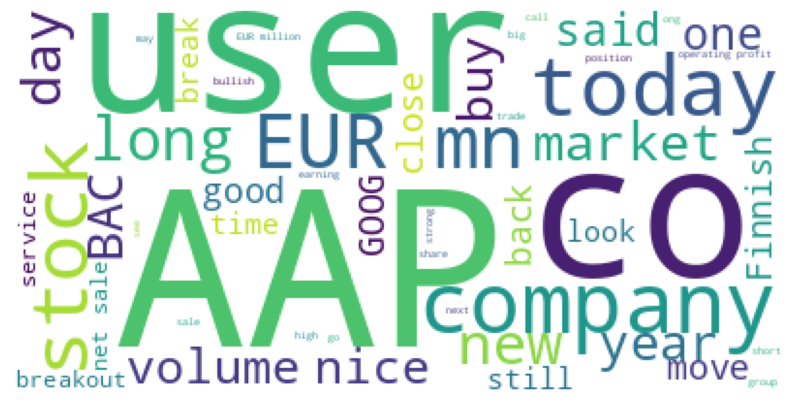

In [ ]:
WCDisplay(df[df.Sentiment=="positive"].Text, 'white')

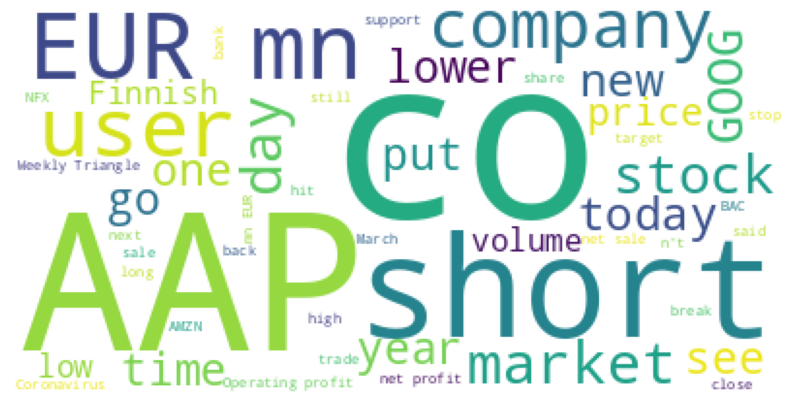

In [ ]:
WCDisplay(df[df.Sentiment=="negative"].Text, 'white')

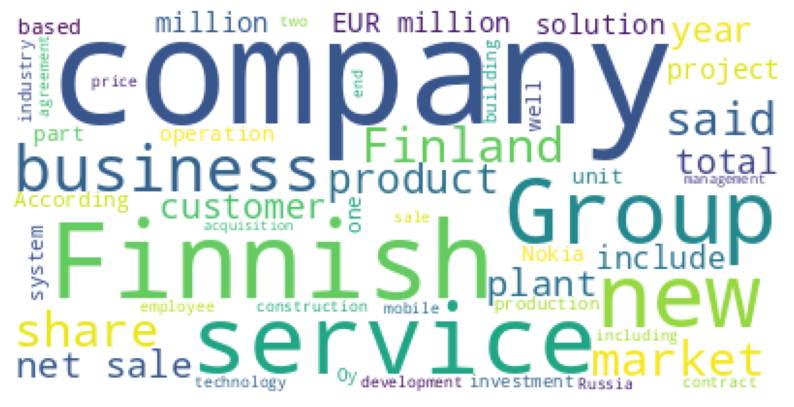

In [ ]:
WCDisplay(df[df.Sentiment=="neutral"].Text, 'white')

In [ ]:
#creating a pipeline withe Tf-IDF vector and multinomailNaive bayes classifier as we have positive, negative and Neutral sentiment.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
#model is trained using FIt method
model.fit(Train_X, Train_Y)
labels = model.predict(Test_X)

In [ ]:
#lables for the input are counted based on the sentiment
Final_lables=labels.tolist()
pcount=Final_lables.count("positive")
ncount=Final_lables.count("negative")
necount=Final_lables.count("neutral")
pcount,ncount,necount

(1718, 65, 160)

Building a sentiment model to pass the above labelled twitter data to predict the sentiment of the tweets and then deciding the stock direction where it is bearish or bullish based on the predicted tweets. Also comparing the above labels with the predicted sentiment in the below model gives the accuracy of the model.

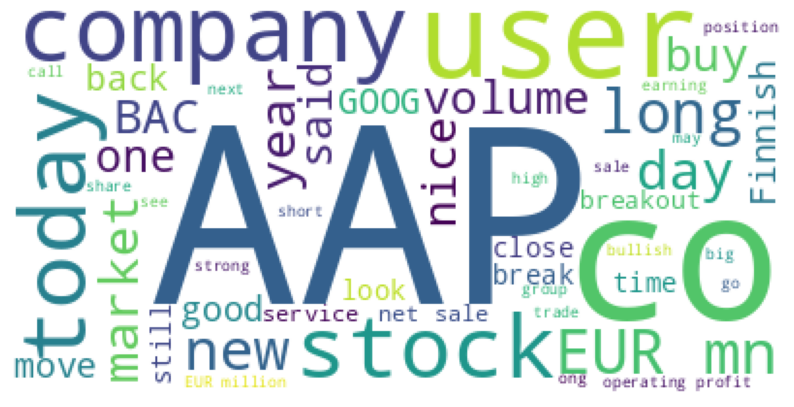

In [ ]:
WCDisplay(df[df.Sentiment=="positive"].Text, 'white')

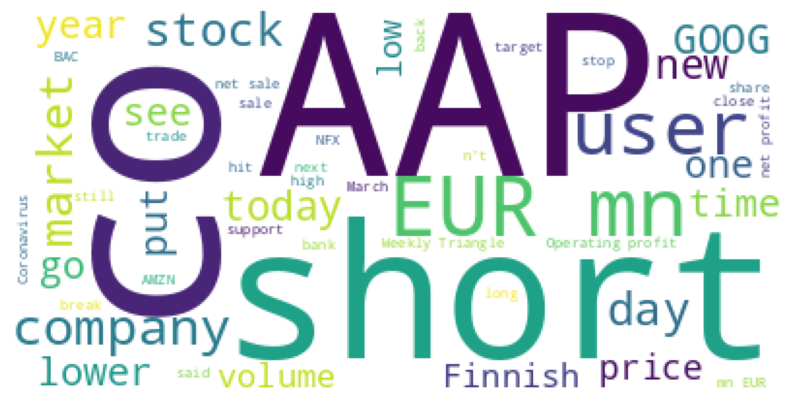

In [ ]:
WCDisplay(df[df.Sentiment=="negative"].Text, 'white')

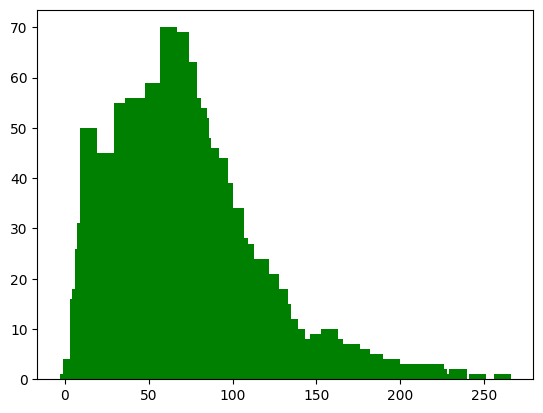

In [ ]:
positive_tweets = df.loc[df['Sentiment']=='positive']
positive_tweets['Text']
#frequency of length of sentences in the positive text of dataset
from collections import OrderedDict
freq = {}
for line in positive_tweets['Text']:
  l=len(line)
  if (l in freq):
    freq[l] += 1
  else:
    freq[l] = 1
final_dict = OrderedDict(sorted(freq.items()))
plt.bar(final_dict.keys(), final_dict.values(), 10, color='g')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: >

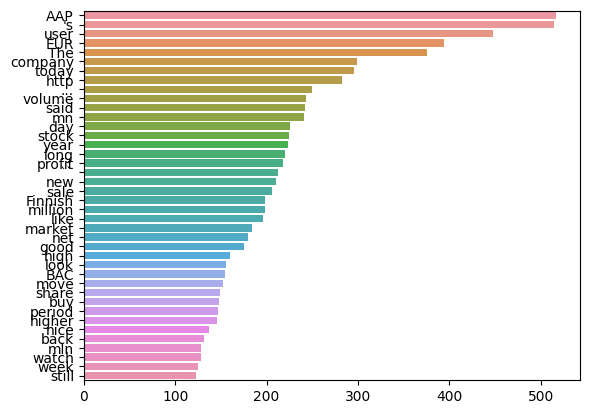

In [ ]:
#most common words in the positive dataset text
from collections import Counter
import nltk
import seaborn as sns

nltk.download('stopwords')
stop=set(stopwords.words('english'))
Input_str=[]
for line in positive_tweets['Text']:
    word_list= line.split()
    for word in word_list:
      Input_str.append(word)
count=Counter(Input_str)
common=count.most_common()
x, y= [], []
symbols = {'~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/'}
for word,count in common[:40]:
    if (word not in stop):
      if(word not in symbols):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

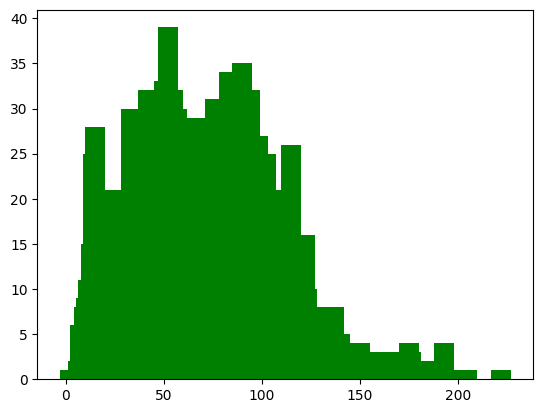

In [ ]:
negative_tweets = df.loc[df['Sentiment']=='negative']
negative_tweets['Text']
#frequency of length of sentences in the negative text of dataset
from collections import OrderedDict
freq = {}
for line in negative_tweets['Text']:
  l=len(line)
  if (l in freq):
    freq[l] += 1
  else:
    freq[l] = 1
final_dict = OrderedDict(sorted(freq.items()))
plt.bar(final_dict.keys(), final_dict.values(), 10, color='g')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: >

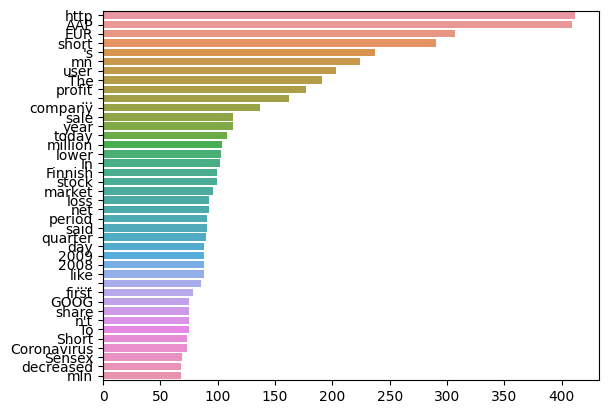

In [ ]:

#most common words in the negative dataset text
from collections import Counter
import nltk
import seaborn as sns

nltk.download('stopwords')
stop=set(stopwords.words('english'))
Input_str=[]
for line in negative_tweets['Text']:
    word_list= line.split()
    for word in word_list:
      Input_str.append(word)
count=Counter(Input_str)
common=count.most_common()
x, y= [], []
symbols = {'~', ':', "'", '+', '[', '\\', '@', '^', '{', '%', '(', '-', '"', '*', '|', ',', '&', '<', '`', '}', '.', '_', '=', ']', '!', '>', ';', '?', '#', '$', ')', '/'}
for word,count in common[:40]:
    if (word not in stop):
      if(word not in symbols):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)